In [ ]:
import pandas as pd

# 데이터셋 로드
df = pd.read_csv('/content/drive/MyDrive/Dev_course/2차 팀 프로젝트/hotel_bookings.csv')

# 처음 몇 줄 확인
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# 'agent', 'company', 'market_segment', 'distribution_channel' 컬럼 삭제
df_cleaned = df.drop(columns=['agent', 'company', 'market_segment', 'distribution_channel'])

# 남은 결측치가 포함된 행 삭제
df_cleaned = df_cleaned.dropna()

# 데이터셋 정보 확인을 위한 요약
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 날짜 관련 컬럼 변환
months_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_cleaned['arrival_date_month'] = df_cleaned['arrival_date_month'].map(months_mapping)

# 'reservation_status_date' 컬럼 날짜 타입으로 변환
df_cleaned['reservation_status_date'] = pd.to_datetime(df_cleaned['reservation_status_date'])

# 레이블 인코딩 적용할 컬럼 선택 (country 제외)
label_encode_columns = ['hotel', 'meal', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

# 레이블 인코더 초기화 및 적용
label_encoder = LabelEncoder()
for col in label_encode_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# 변환 후 데이터 타입 확인
df_cleaned.dtypes


hotel                                      int64
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                       int64
country                                   object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                         int64
assigned_room_type                         int64
booking_changes                            int64
deposit_type        

In [ ]:
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,2015-07-03


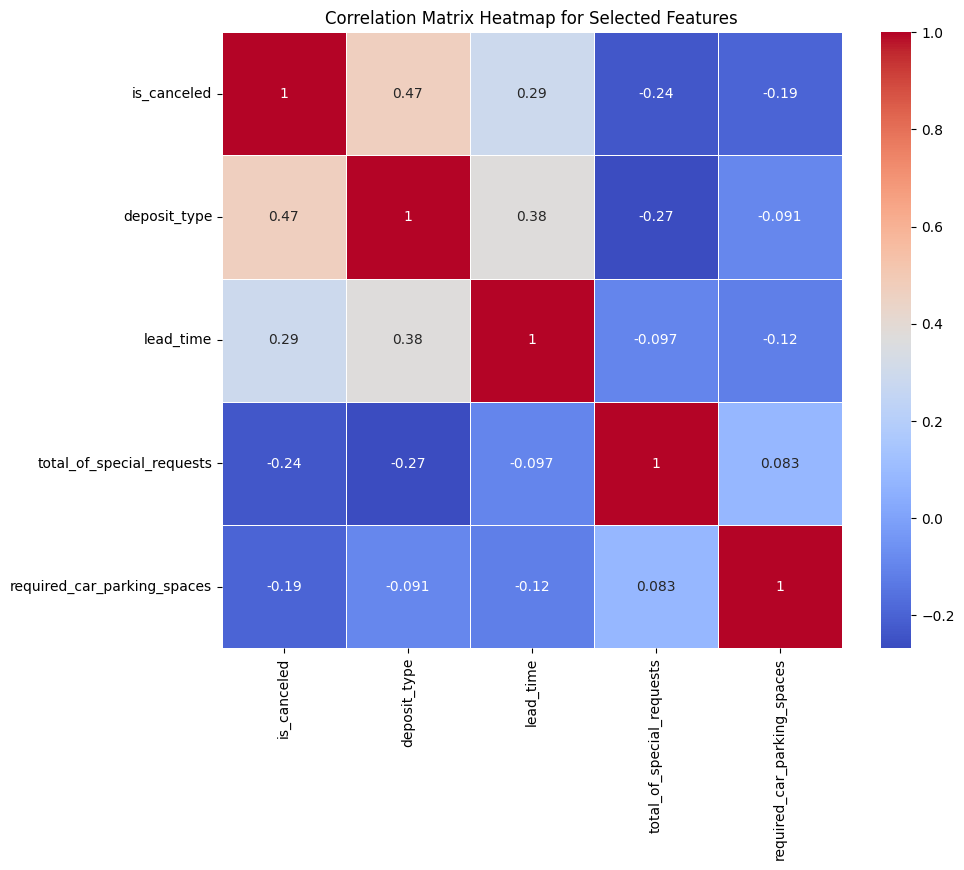

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# 상관관계가 높은 컬럼들만 선택
selected_columns = ['is_canceled', 'deposit_type', 'lead_time', 'total_of_special_requests', 'required_car_parking_spaces']
selected_correlation_matrix = df_cleaned[selected_columns].corr()

# 선택된 컬럼들에 대한 상관관계 매트릭스 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for Selected Features')
plt.show()


In [ ]:
# deposit_type별로 is_canceled의 분포를 교차 테이블로 생성
crosstab_deposit_canceled = pd.crosstab(df_cleaned['deposit_type'], df_cleaned['is_canceled'])

# 교차 테이블 결과
crosstab_deposit_canceled


is_canceled,0,1
deposit_type,,
0,74526,29637
1,93,14480
2,126,36


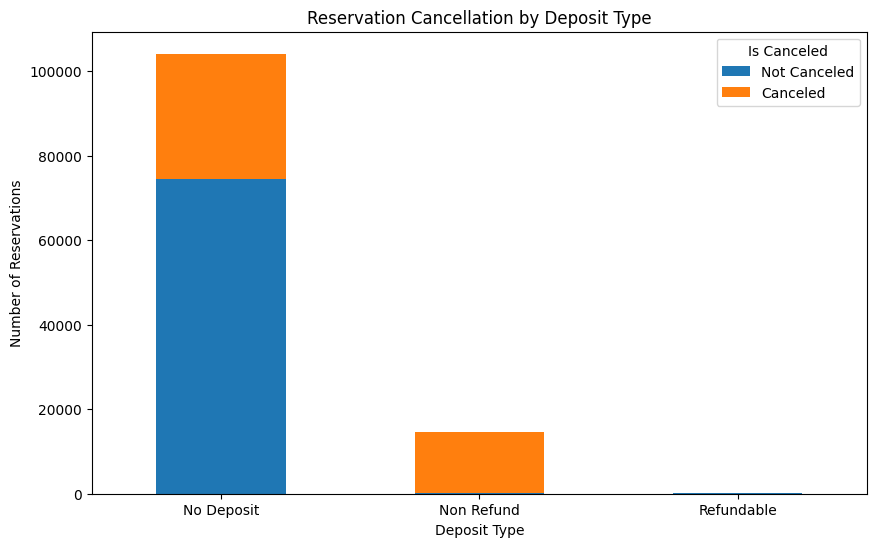

In [ ]:
# 예금 유형별 예약 취소율 시각화
crosstab_deposit_canceled.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Reservation Cancellation by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Reservations')
plt.xticks(ticks=[0, 1, 2], labels=['No Deposit', 'Non Refund', 'Refundable'], rotation=0)
plt.legend(["Not Canceled", "Canceled"], title='Is Canceled')
plt.show()


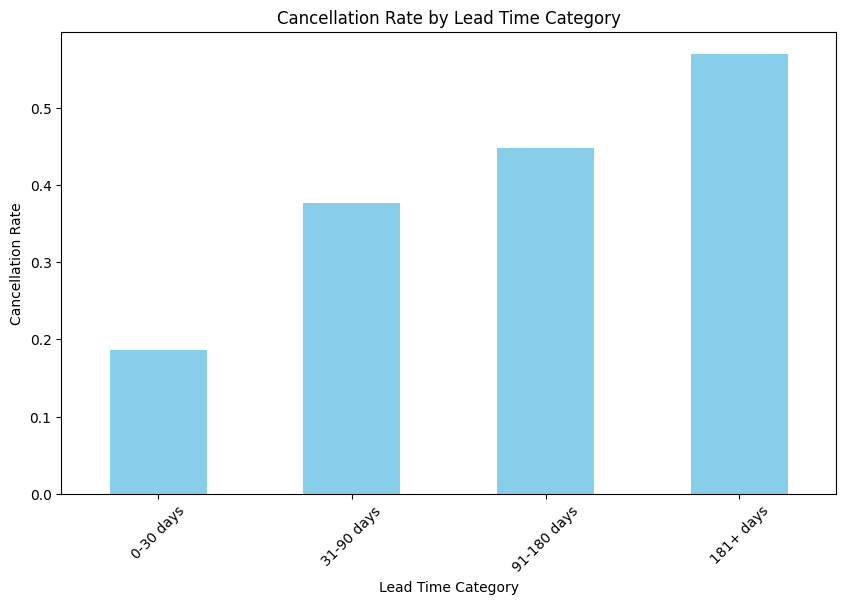

In [ ]:
# lead_time을 범주형 변수로 변환
bins = [0, 30, 90, 180, max(df_cleaned['lead_time'])]
labels = ['0-30 days', '31-90 days', '91-180 days', '181+ days']
df_cleaned['lead_time_category'] = pd.cut(df_cleaned['lead_time'], bins=bins, labels=labels, include_lowest=True)

# lead_time 범주별로 예약 취소 비율 계산
lead_time_cancellation_rate = df_cleaned.groupby('lead_time_category')['is_canceled'].mean()

# lead_time 범주별 예약 취소율 시각화
lead_time_cancellation_rate.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Cancellation Rate by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# lead_time 범주별 데이터 분포 확인
lead_time_distribution = df_cleaned['lead_time_category'].value_counts().sort_index()

lead_time_distribution


lead_time_category
0-30 days      38313
31-90 days     29516
91-180 days    26413
181+ days      24656
Name: count, dtype: int64

In [ ]:
# 각 범주별 총 데이터 수, 예약 취소 수, 예약 취소율 계산
lead_time_summary = df_cleaned.groupby('lead_time_category').agg(
    Total_Data=('is_canceled', 'count'),
    Canceled_Data=('is_canceled', 'sum'),
    Cancellation_Rate=('is_canceled', 'mean')
).reset_index()

lead_time_summary['Cancellation_Rate'] = lead_time_summary['Cancellation_Rate'] * 100  # 백분율로 변환

lead_time_summary


,lead_time_category,Total_Data,Canceled_Data,Cancellation_Rate
0,0-30 days,38313,7151,18.664683
1,31-90 days,29516,11132,37.715138
2,91-180 days,26413,11820,44.750691
3,181+ days,24656,14050,56.984101


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특별 요청 수에 따른 재방문 고객의 분포 확인
repeated_guests_by_special_requests = df.groupby('total_of_special_requests')['is_repeated_guest'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_of_special_requests', y='is_repeated_guest', data=repeated_guests_by_special_requests)
plt.title('재방문율에 따른 특별 요청 수의 영향')
plt.xlabel('특별 요청 수')
plt.ylabel('평균 재방문율')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 고객 만족도와 재방문율
import matplotlib.pyplot as plt
import seaborn as sns

# 특별 요청 수에 따른 재방문 고객의 분포 확인
repeated_guests_by_special_requests = df.groupby('total_of_special_requests')['is_repeated_guest'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_of_special_requests', y='is_repeated_guest', data=repeated_guests_by_special_requests)
plt.title('재방문율에 따른 특별 요청 수의 영향')
plt.xlabel('특별 요청 수')
plt.ylabel('평균 재방문율')
plt.show()

In [ ]:
# 평균 일일 숙박비와 재방문율
adr_by_repeated_guest['is_repeated_guest'] = adr_by_repeated_guest['is_repeated_guest'].map({0: 'Non-repeat', 1: 'Repeat'})

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='is_repeated_guest', y='adr', data=adr_by_repeated_guest)
plt.title('Average ADR Comparison by Guest Repeat Status')
plt.xlabel('Guest Repeat Status')
plt.ylabel('Average ADR (Average Daily Rate)')
plt.xticks([0, 1], ['Non-repeat', 'Repeat'])
plt.show()

In [ ]:
# 객실 유형 일치 여부
df['room_type_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

# 객실 유형 일치 여부에 따른 재방문 고객의 비율 분석
repeat_guests_by_room_match = df.groupby('room_type_match')['is_repeated_guest'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='room_type_match', y='is_repeated_guest', data=repeat_guests_by_room_match)
plt.title('Repeat Guest Rate by Room Type Match')
plt.xlabel('Room Type Match (0: No, 1: Yes)')
plt.ylabel('Repeat Guest Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
# 예약 변경 횟수에 따른 재방문 고객의 비율 분석
repeat_guests_by_booking_changes = df.groupby('booking_changes')['is_repeated_guest'].mean().reset_index()

# 시각화를 위한 데이터 필터링 (너무 많은 변경 횟수는 드물므로, 상위 95%까지만 표시)
quantile_95 = repeat_guests_by_booking_changes['booking_changes'].quantile(0.95)
filtered_data = repeat_guests_by_booking_changes[repeat_guests_by_booking_changes['booking_changes'] <= quantile_95]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='booking_changes', y='is_repeated_guest', data=filtered_data)
plt.title('Repeat Guest Rate by Number of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Repeat Guest Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 체류기간에 따른 재방문율
repeat_guest_rate = data.groupby('total_stay')['is_repeated_guest'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='total_stay', y='is_repeated_guest', data=repeat_guest_rate[repeat_guest_rate['total_stay'] <= 30])
plt.xlabel('Total Stay (nights)')
plt.ylabel('Repeat Guest Rate')
plt.title('Repeat Guest Rate by Total Stay Duration')
plt.grid(True)
plt.xticks(range(0, 31, 1))
plt.yticks([i/10 for i in range(0, 11, 1)])
plt.show()

In [ ]:
#리조트 호텔 6, 9월 높은 취소율 원인분석
# 월별 총 예약 수와 취소된 예약 수 계산
monthly_total_bookings = hotel_data.groupby(['hotel', 'arrival_date_month']).size().unstack(fill_value=0).reindex(columns=months_order)
monthly_canceled_bookings = hotel_data[hotel_data['is_canceled'] == 1].groupby(['hotel', 'arrival_date_month']).size().unstack(fill_value=0).reindex(columns=months_order)

# 월별 취소율 계산
monthly_cancellation_rate = (monthly_canceled_bookings / monthly_total_bookings) * 100

# 바 그래프와 취소율 추세선 함께 작성
fig, ax1 = plt.subplots(figsize=(14, 8))

# 월별 예약자 수 바 그래프
monthly_bookings_sum.T.plot(kind='bar', ax=ax1, width=0.8, alpha=0.7)
ax1.set_title('Monthly Booking Distribution with Cancellation Rate')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Bookings', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(title='Hotel Type')

# 취소율 추세선
ax2 = ax1.twinx()
monthly_cancellation_rate.T.plot(ax=ax2, linestyle='-', marker='o', linewidth=2, alpha=0.6)
ax2.set_ylabel('Cancellation Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.grid(False)  # 기존 그리드 제거

fig.tight_layout()  # 레이아웃 조정

plt.show()

In [ ]:
# Resort Hotel 데이터만 뽑아내기
resort_hotel_bookings = df[df['hotel'] == 'Resort Hotel']

# 월별로 그룹만들고 리드타임 평균 계산하기
monthly_avg_lead_time_resort = resort_hotel_bookings.groupby('arrival_date_month')['lead_time'].mean().reset_index()

# Resort Hotel 데이터 중 예약취소된 것들만 뽑아내기
canceled_resort_bookings = resort_hotel_bookings[resort_hotel_bookings['is_canceled'] == 1]

# 예약 취소된 Resort Hotel 데이터 월별로 그룹만들고 리드타임 평균 계산하기
monthly_avg_lead_time_resort_canceled = canceled_resort_bookings.groupby('arrival_date_month')['lead_time'].mean().reset_index()

# 월 번호를 월 이름으로 변환하주기
monthly_avg_lead_time_resort['arrival_date_month'] = pd.to_datetime(monthly_avg_lead_time_resort['arrival_date_month'], format='%m').dt.month_name()
monthly_avg_lead_time_resort_canceled['arrival_date_month'] = pd.to_datetime(monthly_avg_lead_time_resort_canceled['arrival_date_month'], format='%m').dt.month_name()

# 시각화
plt.figure(figsize=(12, 7))

plt.plot(monthly_avg_lead_time_resort['arrival_date_month'], monthly_avg_lead_time_resort['lead_time'], marker='o', label='All Resort Hotel Bookings')
plt.plot(monthly_avg_lead_time_resort_canceled['arrival_date_month'], monthly_avg_lead_time_resort_canceled['lead_time'], marker='x', linestyle='--', label='Canceled Resort Hotel Bookings')

plt.title('Resort Hotel: Average Lead Time by Arrival Month')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()